In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("/content/drive/My Drive/TaxiPrice/NYCTaxiFares.csv")

In [4]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [5]:
df.shape

(120000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB


In [7]:
import datetime
pd.to_datetime(df['pickup_datetime'])

0        2010-04-19 08:17:56+00:00
1        2010-04-17 15:43:53+00:00
2        2010-04-17 11:23:26+00:00
3        2010-04-11 21:25:03+00:00
4        2010-04-17 02:19:01+00:00
                    ...           
119995   2010-04-18 14:33:03+00:00
119996   2010-04-23 10:27:48+00:00
119997   2010-04-18 18:50:40+00:00
119998   2010-04-13 08:14:44+00:00
119999   2010-04-17 16:00:14+00:00
Name: pickup_datetime, Length: 120000, dtype: datetime64[ns, UTC]

In [8]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])-datetime.timedelta(hours=4)

In [9]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 04:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 11:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 07:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 17:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-16 22:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [10]:
df['year']=df['pickup_datetime'].dt.year
df['month']=df['pickup_datetime'].dt.month
df['day']=df['pickup_datetime'].dt.day
df['hours']=df['pickup_datetime'].dt.hour
df['minutes']=df['pickup_datetime'].dt.minute

In [11]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hours,minutes
0,2010-04-19 04:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17
1,2010-04-17 11:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43
2,2010-04-17 07:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23
3,2010-04-11 17:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25
4,2010-04-16 22:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19


In [12]:
df['daynight']=np.where(df['hours']>12,1,0)

In [13]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hours,minutes,daynight
0,2010-04-19 04:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17,0
1,2010-04-17 11:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43,0
2,2010-04-17 07:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23,0
3,2010-04-11 17:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25,1
4,2010-04-16 22:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19,1


In [14]:
df.drop('pickup_datetime',axis=1,inplace=True)
df.head()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hours,minutes,daynight
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17,0
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43,0
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23,0
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25,1
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19,1


In [15]:
def haversine(df):
    lat1=np.radians(df['pickup_latitude'])
    lat2=np.radians(df['dropoff_latitude'])
    dlat=np.radians(df['dropoff_latitude']-df['pickup_latitude'])
    dlong=np.radians(df['dropoff_longitude']-df['pickup_longitude'])
    a=np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong/2)**2
    c=2 * np.arctan2(np.sqrt(a),np.sqrt(1-a))
    r=6371
    return c * r


In [16]:
df['Total distance']=haversine(df)

In [17]:
df.head()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hours,minutes,daynight,Total distance
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17,0,2.126312
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43,0,1.392307
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23,0,3.326763
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25,1,1.864129
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19,1,7.231321


In [18]:
df.drop(["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"],axis=1,inplace=True)

In [19]:
df.head()

,fare_amount,fare_class,passenger_count,year,month,day,hours,minutes,daynight,Total distance
0,6.5,0,1,2010,4,19,4,17,0,2.126312
1,6.9,0,1,2010,4,17,11,43,0,1.392307
2,10.1,1,2,2010,4,17,7,23,0,3.326763
3,8.9,0,1,2010,4,11,17,25,1,1.864129
4,19.7,1,1,2010,4,16,22,19,1,7.231321


In [20]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [21]:
x.head()

,fare_class,passenger_count,year,month,day,hours,minutes,daynight,Total distance
0,0,1,2010,4,19,4,17,0,2.126312
1,0,1,2010,4,17,11,43,0,1.392307
2,1,2,2010,4,17,7,23,0,3.326763
3,0,1,2010,4,11,17,25,1,1.864129
4,1,1,2010,4,16,22,19,1,7.231321


In [22]:
y.head()

0     6.5
1     6.9
2    10.1
3     8.9
4    19.7
Name: fare_amount, dtype: float64

In [23]:
###Feature Selection
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

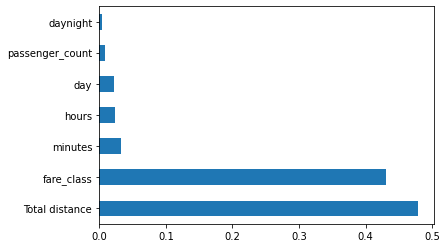

In [24]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=574)

# Linear Regression

In [26]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
pred=lr.predict(x_test)

In [28]:
pred

array([6.25068868, 6.71383117, 5.64808152, ..., 8.74008862, 7.38960221,
       9.83765955])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


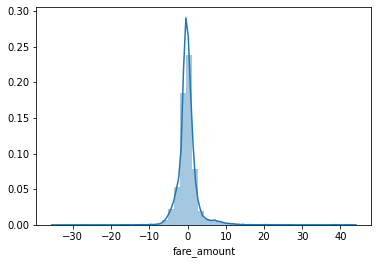

In [29]:
import seaborn as sns
sns.distplot(y_test-pred)

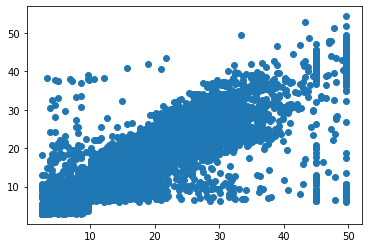

In [30]:
plt.scatter(y_test,pred)

In [31]:
from sklearn import metrics
print('R square:', np.sqrt(metrics.r2_score(y_test, pred)))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R square: 0.9061287264717232
MAE: 1.6954936807854881
MSE: 10.009816430260047
RMSE: 3.163829393355471


# XGBOOST

In [32]:
import xgboost
xb=xgboost.XGBRegressor()
xb.fit(x_train,y_train)

[16:01:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [33]:
pred=xb.predict(x_test)

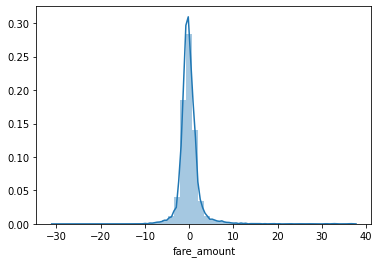

In [34]:
import seaborn as sns
sns.distplot(y_test-pred)

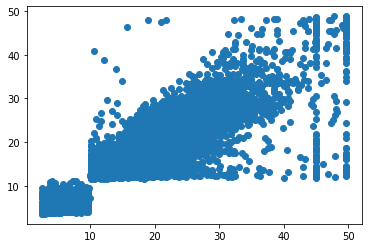

In [35]:
plt.scatter(y_test,pred)

In [36]:
from sklearn import metrics
print('R square:', np.sqrt(metrics.r2_score(y_test, pred)))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R square: 0.9374898935653041
MAE: 1.4266847167227004
MSE: 6.775336365065163
RMSE: 2.6029476301042176


# Hyper Parameter Tuning

In [37]:
#from sklearn.model_selection import RandomizedSearchCV

In [38]:
#n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
#print(n_estimators)

In [39]:
#Randomized Search CV

# Number of trees in Xgboost
#n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
#learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
#subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
#min_child_weight=[3,4,5,6,7]

In [40]:
# Create the random grid
"""random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)"""

"random_grid = {'n_estimators': n_estimators,\n               'learning_rate': learning_rate,\n               'max_depth': max_depth,\n               'subsample': subsample,\n               'min_child_weight': min_child_weight}\n\nprint(random_grid)"

In [41]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#regressor=xgboost.XGBRegressor()

In [42]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
#xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter =5, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [43]:
#xg_random.fit(x_train,y_train)

In [44]:
#xg_random.best_params_

In [45]:
#y_pred=xg_random.predict(X_test)

In [46]:
#sns.distplot(y_test-y_pred)

In [47]:
#plt.scatter(y_test,y_pred)

In [48]:
"""from sklearn import metrics
print('R square:', np.sqrt(metrics.r2_score(y_test, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))"""

"from sklearn import metrics\nprint('R square:', np.sqrt(metrics.r2_score(y_test, y_pred)))\nprint('MAE:', metrics.mean_absolute_error(y_test, y_pred))\nprint('MSE:', metrics.mean_squared_error(y_test, y_pred))\nprint('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))"

**Neural Network**

In [49]:
# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [50]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

# Fitting the ANN to the Training set
model_history=NN_model.fit(x_train, y_train,validation_split=0.33, batch_size = 10, epochs = 20)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1280      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 166,145
Trainable params: 166,145
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
5628/5628 [==============================] - 16s 3ms/step - loss: 2.2022 - mean_absolute_error: 2.2022 - 

In [51]:
prediction=NN_model.predict(x_test)

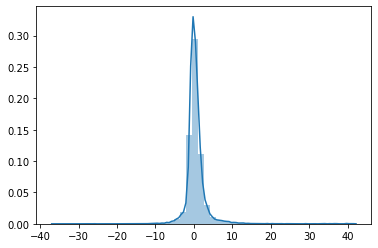

In [52]:
import seaborn as sns
sns.distplot(y_test.values.reshape(-1,1)-prediction)

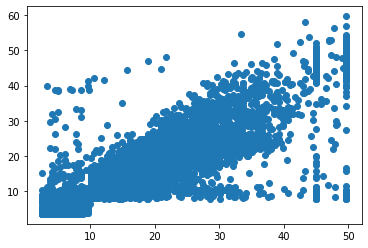

In [53]:
import matplotlib.pyplot as plt
plt.scatter(y_test,prediction)

In [54]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1.4876780787245434
MSE: 9.077168861425342
RMSE: 3.0128340248718217
